## Análise de Dados Sobre Vacinação Covid

<img src="https://imagens.ebc.com.br/ysgCkEBOsVLDaMJWqxiA224C3RQ=/1170x700/smart/https://agenciabrasil.ebc.com.br/sites/default/files/thumbnails/image/vacinacao-parque-da-cidade_mcamgo_abr_180220211818-15.jpg?itok=cWf0--EE">

## 1. Introdução

Este projeto de ciência de dados tem como objetivo analisar os dados de vacinação e mortes, para verificar o impacto da vacinação no número de mortes por Covid no Brasil. Uma vez que a <b> Covid-19</b> é uma doença nova e a ciência está no início das análises desses dados para avaliar suas implicações, posto que <b>nunca</b> houve vacinação em escala mundial para combater esta doença tão terrível, que vem assolando toda a humanidade. 

## 2. Descrição dos Dados

Foram coletados dois datasets para a realização das análises de vacinação e mortes por Covid-19 no Brasil:

- Os dados sobre a vacinação da Covid-19 foram coletados no [Github do Our World in Data](https://github.com/owid), uma organização que trabalha com vários pesquisadores em volta do mundo com o objetivo de tornar o conhecimento dos grandes problemas acessível e compreensível.


- Os dados de morte por Covid-19 no Brasil são do [Portal da Transparência do Registro Cívil](https://transparencia.registrocivil.org.br/), dados estes que foram consolidados e disponibilizados no [Github de Marcelo Oliveira](https://github.com/capyvara), conhecido por ser um cientista de dados do [Grupo Infovid](https://twitter.com/grupo_infovid) (grupo interdisciplinar dedicado a divulgação de informações científicas e enfrentamento de desinformações sobre a COVID-19).

## 3. Importação de Bibliotecas

In [1]:
import pandas as pd # biblioteca para trabalhar com os dados
import numpy as np 
import seaborn as sns # biblioteca para visualização de dados
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime # biblioteca para trabalhar com dados do tipo Data e Hora.
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = "{:.2f}".format ## Formatar números para o tipo float nos gráficos

## 4. Número da Vacinação x Mortes no Brasil

### 4.1. Carregamento dos Dados

Para o carregamento dos dados no formato ``csv`` armazenados nos githubs, utilizamos a função ``read_csv`` do pandas. Utilizamos os parâmetros ``parse_date`` e ``date_parser``, para convertermos os dados da coluna ``date`` para o tipo ``datetime64[ns]`` nos nossos datasets, para que o ``seaborn`` (biblioteca python para visualização de dados) saiba lidar melhor com esses dados e melhorar a visualização dos gráficos.

In [2]:
dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')

dados_covid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv",
                    encoding="ISO-8859-1", sep=",",
                    thousands=".", decimal=",", parse_dates=['date'], date_parser=dateparse)

In [3]:
mortes_covid_br = pd.read_csv('https://raw.githubusercontent.com/capyvara/brazil-civil-registry-data/master/civil_registry_covid_cities_detailed.csv',
                    encoding="utf-8", sep=",",
                    thousands=".", decimal=",", parse_dates=['date'], date_parser=dateparse)

In [4]:
dados_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,10.00,10.00,nan,nan,nan,nan,...,nan,597029.00,959.00,nan,nan,37746.00,5.00,6483.00,511.00,nan
1,AFG,Asia,Afghanistan,2020-02-25,10.00,0.00,nan,nan,nan,nan,...,nan,597029.00,959.00,nan,nan,37746.00,5.00,6483.00,511.00,nan
2,AFG,Asia,Afghanistan,2020-02-26,10.00,0.00,nan,nan,nan,nan,...,nan,597029.00,959.00,nan,nan,37746.00,5.00,6483.00,511.00,nan
3,AFG,Asia,Afghanistan,2020-02-27,10.00,0.00,nan,nan,nan,nan,...,nan,597029.00,959.00,nan,nan,37746.00,5.00,6483.00,511.00,nan
4,AFG,Asia,Afghanistan,2020-02-28,10.00,0.00,nan,nan,nan,nan,...,nan,597029.00,959.00,nan,nan,37746.00,5.00,6483.00,511.00,nan


In [5]:
mortes_covid_br.head()

,date,state,state_ibge_code,city,city_ibge_code,place,gender,age_group,deaths_sars,deaths_pneumonia,...,deaths_others,deaths_covid19,deaths_stroke,deaths_stroke_covid19,deaths_cardiopathy,deaths_cardiogenic_shock,deaths_heart_attack,deaths_heart_attack_covid19,deaths_sudden_cardiac,created_at
0,2019-01-01,AC,12,Rio Branco,1200401,hospital,F,80-89,nan,nan,...,nan,nan,nan,nan,nan,nan,1.00,nan,nan,2021-04-03 11:56:00
1,2019-01-01,AC,12,Rio Branco,1200401,hospital,M,30-39,nan,nan,...,1.00,nan,nan,nan,nan,nan,nan,nan,nan,2021-05-01 15:33:00
2,2019-01-01,AC,12,Rio Branco,1200401,hospital,M,50-59,nan,nan,...,nan,nan,1.00,nan,nan,nan,nan,nan,nan,2021-05-01 15:33:00
3,2019-01-01,AC,12,Rio Branco,1200401,hospital,M,80-89,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2021-05-01 15:33:00
4,2019-01-01,AC,12,Rio Branco,1200401,hospital,M,9-,nan,1.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2021-05-01 15:33:00


Utilizamos a função ``info`` do pandas, visualização das colunas e seus tipos carregados em ``dataframes`` (objeto da biblioteca do pandas para manipulação dos dados):

In [6]:
dados_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95271 entries, 0 to 95270
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               95271 non-null  object        
 1   continent                              90773 non-null  object        
 2   location                               95271 non-null  object        
 3   date                                   95271 non-null  datetime64[ns]
 4   total_cases                            92162 non-null  float64       
 5   new_cases                              92159 non-null  float64       
 6   new_cases_smoothed                     91149 non-null  float64       
 7   total_deaths                           82167 non-null  float64       
 8   new_deaths                             82323 non-null  float64       
 9   new_deaths_smoothed                    91149 non-null  float6

In [7]:
mortes_covid_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560444 entries, 0 to 560443
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   date                         560444 non-null  datetime64[ns]
 1   state                        560444 non-null  object        
 2   state_ibge_code              560444 non-null  int64         
 3   city                         560444 non-null  object        
 4   city_ibge_code               560444 non-null  int64         
 5   place                        560444 non-null  object        
 6   gender                       560444 non-null  object        
 7   age_group                    549923 non-null  object        
 8   deaths_sars                  10612 non-null   float64       
 9   deaths_pneumonia             118358 non-null  float64       
 10  deaths_respiratory_failure   59858 non-null   float64       
 11  deaths_septicemia         

Ao executar a função ``info``  observamos várias informações que poderíamos utilizar nas análises. 

Para as análises vacinação e mortes no Brasil, utilizaremos os dados das colunas nos dados extraídos do <b>Our World in Data</b>:

- <b>date (data da vacinação):</b> Para analisarmos a evolução da vacinação ao passar do tempo;
- <b>location (localização ou país da vacinação): </b> Para selecionar somente a quantidade de pessoas vacinadas no Brasil;
- <b>people_vaccinated (total de pessoas vacinadas)</b>: Para analisar a quantidade de pessoas vacinadas;
- <b>people_vaccinated_per_hundred (percentual pessoas vacinadas)</b>: Para analisar o percentual de pessoas vacinadas no Brasil.

- <b>new_deaths (novas mortes por covid-19)</b>: Para analisar a quantidade de novas mortes de pessoas por covid-19 no Brasil.


Para as análises de morte causada por Covid-19 agrupado por faixa etária do <b>Registro Cívil</b>, utilizaremos os dados:

- <b>date (data do registro da morte):</b> Para analisarmos a evolução das mortes por Covid-19 ao passar do tempo;
- <b>age_group (Faixa Etária): </b> Para analisarmos as mortes por faixa etária no Brasil;
- <b> state (Estado): </b> Para analisarmos as mortes por Estado;
- <b> city (Cidade): </b> Para analisarmos as mortes por Cidade;
- <b> deaths_covid19 (total de pessoas mortas)</b>: Para contabilizar as pessoas mortas por Covid-19 no Brasil;


### 4.2. Análise

In [8]:
len(dados_covid['location'].unique())

229

Com a função ``len`` utilizada em conjunto com o função ``unique`` na coluna <b>location</b>, podemos verificar que na coluna <b>location</b> do nosso dataset de vacinação não está somente agrupado por países, uma vez que temos somente <b>195 países</b> no mundo (registrados na ONU). 

In [9]:
mortes_covid_br['state'].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [10]:
len(mortes_covid_br['state'].unique())

27

Utilizando as funções ``unique`` e ``len`` na coluna ``state`` podemos verificar também, que nosso dataset de mortes por covid no Brasil está completo com informações dos nossos <b>26 estados e 1 distríto federal</b>.

In [11]:
mortes_covid_br['city'].unique()

array(['Rio Branco', 'Maceió', 'Manaus', 'Macapá', 'Feira de Santana',
       'Salvador', 'Fortaleza', 'Brasília', 'Serra', 'Vitória',
       'Aparecida de Goiânia', 'Goiânia', 'São Luís', 'Belo Horizonte',
       'Contagem', 'Juiz de Fora', 'Uberlândia', 'Campo Grande', 'Cuiabá',
       'Ananindeua', 'Belém', 'João Pessoa', 'Jaboatão dos Guararapes',
       'Recife', 'Teresina', 'Curitiba', 'Londrina', 'Belford Roxo',
       'Campos dos Goytacazes', 'Duque de Caxias', 'Niterói',
       'Nova Iguaçu', 'Rio de Janeiro', 'São Gonçalo', 'Natal',
       'Porto Velho', 'Boa Vista', 'Caxias do Sul', 'Porto Alegre',
       'Florianópolis', 'Joinville', 'Aracaju', 'Botucatu', 'Campinas',
       'Guarulhos', 'Osasco', 'Ribeirão Preto', 'Santo André', 'Serrana',
       'Sorocaba', 'São Bernardo do Campo', 'São José dos Campos',
       'São Paulo', 'Palmas'], dtype=object)

In [12]:
len(mortes_covid_br['city'].unique())

54

Utilizando função ``unique`` e ``len`` na coluna ``city`` podemos verificar que nosso dataset de mortes por covid no Brasil, contém somente dados de mortes em <b>54 cidades</b> do Brasil.

Vamos analisar a relação de vacinação do Brasil com outros países, para isto, precisaremos <b> excluir</b> dados de informações na coluna <b>locate</b> de agrupamentos de países, senão, estaremos retornando dados redundantes, e comparando países com continentes:

- <b>World</b>: agrupamento de vacinados no mundo.
- <b>Asia</b>: agrupamento de vacinados de paises no continente da Ásia.
- <b>North America:</b> agrupamento de vacinados de paises no continente da América do Norte.
- <b>Europa:</b> agrupamento de vacinados de paises na continente da Europa.
- <b>South America:</b> agrupamento de vacinados de paises na continente da América do Sul
- <b>Africa: </b> agrupamento de vacinados de paises  na continente da África.
- <b>United Kingdom:</b> agrupamento de vacinados de paises do Reino Unido (formado pelos países: Inglaterra, País de Gales, Irlanda do Norte e Escócia)
- <b>European Union:</b> agrupamento de vacinados de paises na União Européia.
- <b> Lower middle income:</b> agrupamento dos países menos desenvolvidos.
- <b> Upper middle income:</b> agrupamento dos países mais desenvolvidos.

In [13]:
exclusao = ['World','Asia','High income','Upper middle income','North America','Europe','Lower middle income','European Union','South America','United Kingdom','Africa']

Para a exclusão desses dados utilizaremos a função ``query`` e selecionados em nosso dataset somente os dados dos países para análise de comparação.

In [14]:
dados_covid = dados_covid.query("location not in @exclusao")

In [15]:
pessoas_vacinadas = dados_covid[['location','people_vaccinated']].groupby('location').sum().sort_values(by='people_vaccinated', ascending=False)
percentual_pessoas_vacinadas = dados_covid[['location','people_vaccinated_per_hundred']].groupby('location').sum().sort_values(by='people_vaccinated_per_hundred', ascending=False)

In [16]:
pessoas_vacinadas.index.name = 'pais'
pessoas_vacinadas.columns = ['pessoas_vacinadas']
percentual_pessoas_vacinadas.index.name = 'pais'
percentual_pessoas_vacinadas.columns = ['percentual_pessoas_vacinadas']

In [17]:
pessoas_vacinadas.rank(ascending=False).loc['Brazil']

pessoas_vacinadas   3.00
Name: Brazil, dtype: float64

Com a função ``rank`` do pandas podemos verificar que o <b>Brasil</b> está em <b>3º lugar</b> em <b>números absolutos</b> de vacinação com relação a outros países do mundo.

In [18]:
percentual_pessoas_vacinadas.rank(ascending=False).loc['Brazil']

percentual_pessoas_vacinadas   51.00
Name: Brazil, dtype: float64

Apesar do Brasil estar em <b> 3º lugar </b> em números absolutos, verificamos que ele está somente no <b> 51º lugar </b> ao contabilizarmos o percentual de pessoas vacinadas. 

In [19]:
paises_analise = ['England','United States','Israel','Brazil']
comparando_paises = dados_covid[dados_covid['location'].isin(paises_analise)]
comparando_paises = comparando_paises[['date','location','total_vaccinations_per_hundred']]
comparando_paises.columns = ['data','pais','percentual_pessoas_vacinadas']
comparando_paises = comparando_paises.set_index(['pais','data'])
comparando_paises = comparando_paises.dropna()
comparando_paises = comparando_paises.reset_index()
comparando_paises = comparando_paises.set_index('data')

In [24]:
comparando_paises['percentual_pessoas_vacinadas'].loc[(comparando_paises.pais == 'Israel') & (comparando_paises['percentual_pessoas_vacinadas'] < comparando_paises['percentual_pessoas_vacinadas'].rolling(window=3).mean())] = comparando_paises[(comparando_paises.pais == 'Israel') & (comparando_paises['percentual_pessoas_vacinadas'] < comparando_paises['percentual_pessoas_vacinadas'].mean())]['percentual_pessoas_vacinadas'].apply(lambda x: np.nan)
comparando_paises['percentual_pessoas_vacinadas'].loc[(comparando_paises.pais == 'England') & (comparando_paises['percentual_pessoas_vacinadas'] < comparando_paises['percentual_pessoas_vacinadas'].rolling(window=3).mean())] = comparando_paises[(comparando_paises.pais == 'England') & (comparando_paises['percentual_pessoas_vacinadas'] < comparando_paises['percentual_pessoas_vacinadas'].mean())]['percentual_pessoas_vacinadas'].apply(lambda x: np.nan)
comparando_paises['percentual_pessoas_vacinadas'].loc[(comparando_paises.pais == 'Brazil') & (comparando_paises['percentual_pessoas_vacinadas'] < comparando_paises['percentual_pessoas_vacinadas'].rolling(window=3).mean())] = comparando_paises[(comparando_paises.pais == 'Brazil') & (comparando_paises['percentual_pessoas_vacinadas'] < comparando_paises['percentual_pessoas_vacinadas'].mean())]['percentual_pessoas_vacinadas'].apply(lambda x: np.nan)
comparando_paises['percentual_pessoas_vacinadas'].loc[(comparando_paises.pais == 'United States') & (comparando_paises['percentual_pessoas_vacinadas'] < comparando_paises['percentual_pessoas_vacinadas'].rolling(window=3).mean())] = comparando_paises[(comparando_paises.pais == 'United States') & (comparando_paises['percentual_pessoas_vacinadas'] < comparando_paises['percentual_pessoas_vacinadas'].mean())]['percentual_pessoas_vacinadas'].apply(lambda x: np.nan)

In [25]:
comparando_paises['percentual_pessoas_vacinadas'] = comparando_paises['percentual_pessoas_vacinadas'].fillna(method='ffill')

In [26]:
start_date = '2021-01-15'
end_date = '2021-06-01'

In [27]:
mask = (comparando_paises.index > start_date) & (comparando_paises.index <= end_date)

In [28]:
comparando_paises = comparando_paises[mask]

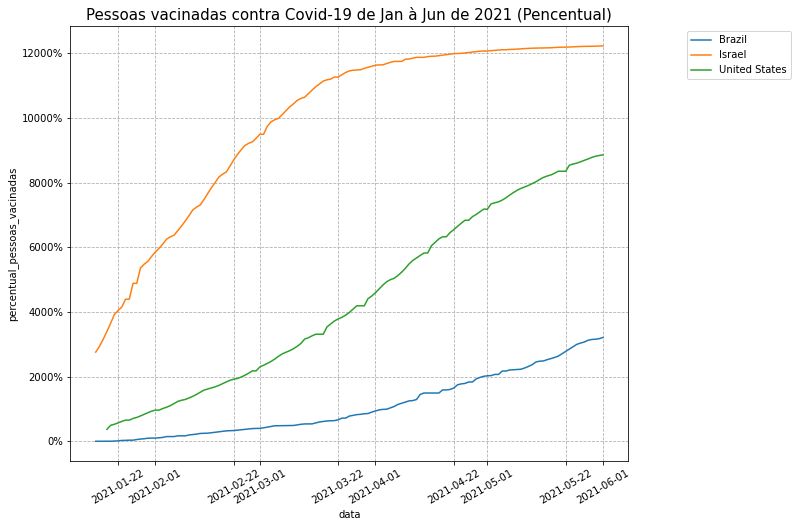

In [55]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=comparando_paises, x=comparando_paises.index, y="percentual_pessoas_vacinadas", hue="pais")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_title('Pessoas vacinadas contra Covid-19 de Jan à Jun de 2021 (Pencentual)', fontsize = 15)
plt.grid(linestyle="--")
plt.show()

No gráfico acima podemos visualizar a evolução da <b> percentual de pessoas vacinadas</b> no Brasil (azul) em relação com outros países, como <b>Estados Unidos</b> e <b>Inglaterra</b>, desde <b> janeiro</b> até começo de <b>junho de 2021</b>. E percebemos uma subida na vacinação, porém uma elevação mais gradual se comparada a esses países. 

In [31]:
mortes_cov_br = dados_covid[dados_covid['location'] == 'Brazil']

In [32]:
mortes_cov_br = mortes_cov_br[['date','new_deaths']]
mortes_cov_br = mortes_cov_br[mortes_cov_br['new_deaths'] > 0]
mortes_cov_br = mortes_cov_br.set_index('date')
mortes_cov_br = mortes_cov_br.rolling(window=7).mean()

In [33]:
start_date = '2021-01-01'
end_date = '2021-06-01'

mask = (mortes_cov_br.index > start_date) & (mortes_cov_br.index <= end_date)

mortes_cov_br = mortes_cov_br[mask]

No handles with labels found to put in legend.


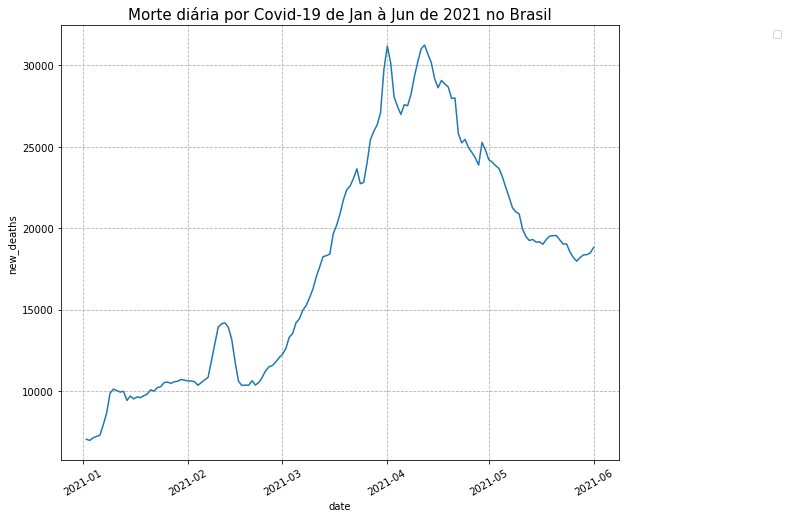

In [34]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=mortes_cov_br, x=mortes_cov_br.index, y="new_deaths")
ax.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5),)
plt.xticks(rotation=30)
ax.set_title('Morte diária por Covid-19 de Jan à Jun de 2021 no Brasil', fontsize = 15)
plt.grid(linestyle="--")
plt.show()

No gráfico acima podemos visualizar uma queda forte na <b> média móvel</b> de números de mortes de Covid-19 do Brasil no período de <b>abril a junho de 2021</b>. 

In [35]:
mortes_covid_br = mortes_covid_br[['date','age_group','deaths_covid19']]

In [36]:
mortes_covid_br.columns = ['data','faixa_etaria','mortes_covid']

In [37]:
mortes_covid_br['faixa_etaria'].unique()

array(['80-89', '30-39', '50-59', '9-', '90-99', '10-19', nan, '60-69',
       '40-49', '70-79', '20-29', '100+'], dtype=object)

In [38]:
def definir_faixa(faixa):
    
    if (faixa == '9-'):
        faixa = '0-29'
    elif (faixa == '10-19'):
        faixa = '0-29'
    elif (faixa == '20-29'):
        faixa = '0-29'
    elif (faixa == '80-89'):
        faixa = '80+'
    elif (faixa == '90-99'):
        faixa = '80+'
    elif (faixa == '100+'):
        faixa = '80+'    
    else: faixa
    
    return faixa

In [39]:
mortes_covid_br['faixa_etaria'] = mortes_covid_br['faixa_etaria'].apply(definir_faixa)

In [40]:
mortes_covid_br['faixa_etaria'].unique()

array(['80+', '30-39', '50-59', '0-29', nan, '60-69', '40-49', '70-79'],
      dtype=object)

In [41]:
mortes_covid_br = mortes_covid_br.groupby(['faixa_etaria','data']).sum()

In [42]:
mortes_covid_br = mortes_covid_br[['mortes_covid']]

In [43]:
mortes_covid_br = mortes_covid_br[mortes_covid_br > 0]
mortes_covid_br = mortes_covid_br.dropna()

In [44]:
mortes_covid_br = mortes_covid_br.rolling(window=7).mean()

In [45]:
start_date = '2021-03-01'
end_date = '2021-05-01'

In [46]:
mortes_covid_br = mortes_covid_br.reset_index()

In [47]:
mortes_covid_br = mortes_covid_br.set_index('data')

In [48]:
start_date = '2021-01-01'
end_date = '2021-06-01'

In [49]:
mask = (mortes_covid_br.index > start_date) & (mortes_covid_br.index <= end_date)

In [50]:
mortes_covid_br = mortes_covid_br[mask]

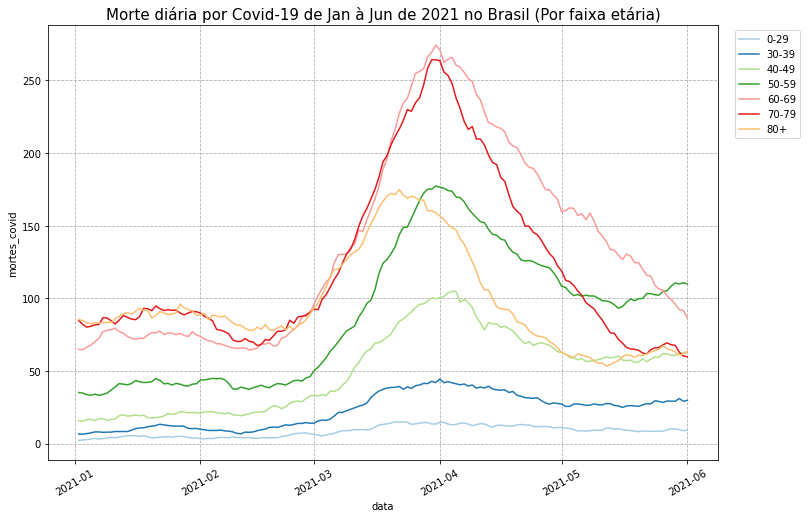

In [51]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mortes_covid_br, x='data', y="mortes_covid", hue="faixa_etaria" ,palette='Paired')
ax.legend(bbox_to_anchor=(0.63, 0.5, 0.5, 0.5),)
ax.set_title('Morte diária por Covid-19 de Jan à Jun de 2021 no Brasil (Por faixa etária)', fontsize = 15)
plt.xticks(rotation=30)
plt.grid(linestyle="--")
plt.show()

No gráfico acima podemos visualizar uma queda acentuada nas mortes de pessoas com <b>mais de 50 anos </b> por Covid-19 do Brasil. Enquanto que as mortes de pessoas com <b> menos de 40 anos</b> se apresenta mais estável no período de abril até junho de 2021.

### 4.3. Conclusões

- Esta análise demostra que a nossa vacinação está muito lenta. O que é uma tragédia, uma vez que nosso país é (ou era) <b> refêrencia </b> em vacinação no mundo. Poderíamos estar vacinando muito mais pessoas e salvando muito mais vidas.

- Apesar da evolução lenta da vacinação no Brasil, podemos verificar um impacto significativo nas mortes por Covid-19, principalmente nas <b>faixas etárias vacinadas (pessoas com mais de 50 anos)</b>. 

## 5. Referências

- [Our World in Data](https://ourworldindata.org/);
- [Marcelo Oliveira](https://github.com/capyvara);
- [Atila Iamarino](https://www.youtube.com/c/AtilaIamarino);
- [Alura](https://www.alura.com.br/);
- [Bootcamp Data Science Aplicada](https://www.alura.com.br/bootcamp/data-science-aplicada/matriculas-abertas);
- [Portal da Transparência do Registro Cívil](https://transparencia.registrocivil.org.br/);
- [Storytelling with Data](https://www.storytellingwithdata.com/);
- [Seaborn](https://seaborn.pydata.org/);
- [Numpy](https://numpy.org/](https://numpy.org/);
- [Pandas](https://pandas.pydata.org/](https://pandas.pydata.org/);
- [Matplotlib](https://matplotlib.org/](https://matplotlib.org/)

## 6. Contatos

Alguma dica, dúvida ou sugestão? Fique à vontade para contatar:

- https://www.linkedin.com/in/diogo-miranda-de-azevedo-63758425/
- https://github.com/diogoslz
- diogonick@gmail.com